In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from openai import OpenAI

client = OpenAI()

In [134]:
from usage import print_usage

In [36]:
for item in client.models.list():
    print(item.id)

gpt-4-0613
gpt-4
gpt-3.5-turbo
gpt-5.2-codex
gpt-realtime-mini-2025-12-15
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
dall-e-3
dall-e-2
gpt-4-1106-preview
gpt-3.5-turbo-1106
text-embedding-3-small
text-embedding-3-large
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
gpt-4o-mini
gpt-4o-2024-08-06
chatgpt-4o-latest
gpt-4o-realtime-preview
omni-moderation-latest
gpt-4o-realtime-preview-2024-12-17
o1-2024-12-17
o1
computer-use-preview
o3-mini
o3-mini-2025-01-31
gpt-4o-2024-11-20
gpt-4o-search-preview-2025-03-11
gpt-4o-search-preview
gpt-4o-mini-search-preview-2025-03-11
gpt-4o-mini-search-preview
gpt-4o-mini-transcribe
gpt-4o-mini-tts
o3-2025-04-16
o4-mini-2025-04-16
o3
o4-mini
gpt-4.1-2025-04-14
gpt-4.1
gpt-4.1-mini-2025-04-14
gpt-4.1-mini
gpt-4.1-nano-2025-04-14
gpt-4.1-nano
gpt-image-1
codex-mini-latest
gpt-4o-realtime-preview-2025-06-03
o4-mini-deep-research
gpt-4o-transcribe-diarize
gp

In [151]:
model = "text-embedding-3-large"
usages = []


In [142]:
def usage_for_embedding(usages,cost):
    sum = 0
    for prompt, total_tokens in usages:
        # print(total_tokens)
        sum += total_tokens[1]
    totalcost = sum * cost /1000000
    print(f"Total cost for embeddings: ${totalcost:.6f}")
    return totalcost


In [119]:
# with open("13chil.txt", "r") as f:
#     input1 = f.read()

In [ ]:
input1 = "God is Angry."

input2 = "A fast dark-colored fox leaps above a sleepy cainen."

In [160]:
verses = []
with open("10.txt.utf-8", "r") as f:

    for line in f:
        verse = line.strip()
        if verse:
            verses.append(verse)

    print(verses[:5])

    

['\ufeffThe Project Gutenberg eBook of The King James Version of the Bible', 'This ebook is for the use of anyone anywhere in the United States and', 'most other parts of the world at no cost and with almost no restrictions', 'whatsoever. You may copy it, give it away or re-use it under the terms', 'of the Project Gutenberg License included with this ebook or online']


In [162]:
def get_embedding(input_text: str) -> np.ndarray:
    response = client.embeddings.create(
        model=model,
        input=input_text,
    )
    usage = response.usage
    usages.append(usage)
    embedding = response.data[0].embedding
    return np.array(embedding)

In [167]:
usage_for_embedding(usages=usages, cost=0.13)

Total cost for embeddings: $0.006925


0.00692471

In [166]:
bible_embeddings = []
i= 0
for verse in verses[2000:3000]:
    i += 1
    print(i)

    bible_embeddings.append(get_embedding(verse))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [175]:
bible_zipped = list(zip(verses[2000:3000], bible_embeddings))

In [187]:
def search_embedings(query: str, bible_embeddings, top_k: int = 5):

    query_embedding = get_embedding(query)
    verses = []


    similarities = []
    for verse_embedding in bible_embeddings:
        # print(verse_embedding)
        similarity = query_embedding @ verse_embedding[1].T
        if similarity > .4:
            similarities.append(verse_embedding[0])


    for index in similarities:
        print(index)
        print("\n")

In [192]:

search_embedings("the pharoh sucked", bible_zipped, top_k=10)

it down to Egypt.


of Pharaoh’s, and captain of the guard.


king of Egypt and his baker had offended their lord the king of Egypt.


into Pharaoh’s cup, and I gave the cup into Pharaoh’s hand.


of all manner of bakemeats for Pharaoh; and the birds did eat them out


shall Pharaoh lift up thy head from off thee, and shall hang thee on a


he gave the cup into Pharaoh’s hand: 40:22 But he hanged the chief


41:1 And it came to pass at the end of two full years, that Pharaoh


well favoured and fat kine. So Pharaoh awoke.


And Pharaoh awoke, and, behold, it was a dream.


wise men thereof: and Pharaoh told them his dream; but there was none


that could interpret them unto Pharaoh.


my faults this day: 41:10 Pharaoh was wroth with his servants, and put


raiment, and came in unto Pharaoh.


land of Egypt for badness: 41:20 And the lean and the ill favoured


hath shewed Pharaoh what he is about to do.


about to do he sheweth unto Pharaoh.


land of Egypt.


made him ruler over all t

Usage(prompt_tokens=4, total_tokens=4)
Total cost for embeddings: $0.000316
3072


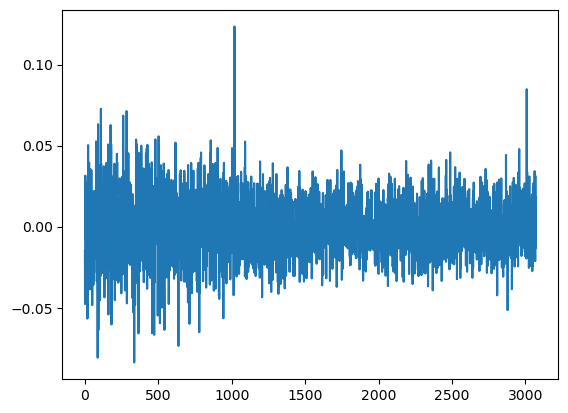

In [ ]:


response1 = client.embeddings.create(
    input=input1,
    model=model
)
usages.append(response1.usage)
print(response1.usage)

usage_for_embedding(usages=usages, cost=0.02)

input_vector=(response1.data[0].embedding)
print(len(input_vector))
input_np1 = np.array(input_vector)
plt.plot(input_np1)
plt.show()

Usage(prompt_tokens=12, total_tokens=12)


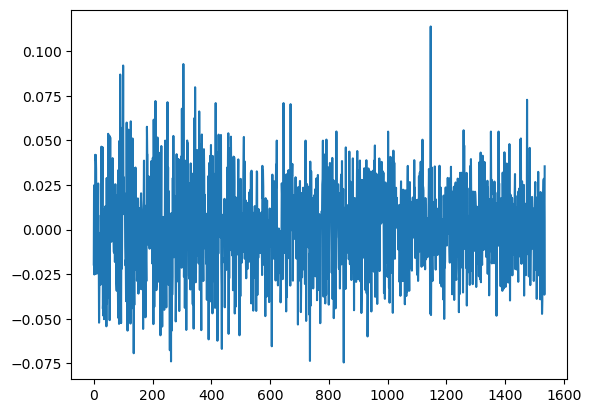

In [122]:

response2 = client.embeddings.create(
    input=input2,
    model=model
)
usages.append(response2.usage)
print(response2.usage)

# print_usage(model, usages)

input_vector=(response2.data[0].embedding)
len(input_vector)
input_np2 = np.array(input_vector)
plt.plot(input_np2)
plt.show()

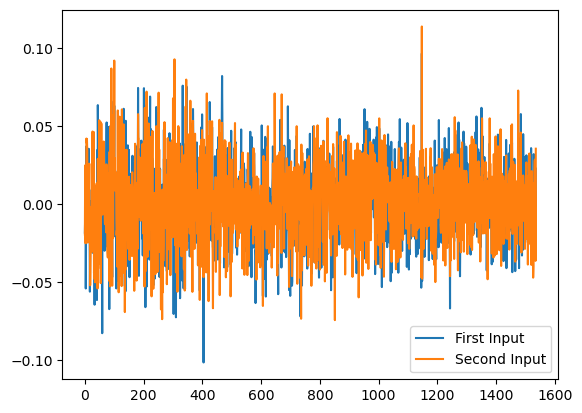

In [ ]:
plt.plot(input_np1, label='First Input')
plt.plot(bible, label='Second Input')
plt.legend()
plt.show()

In [159]:
input_np2 @ bible_np.T

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3072 is different from 1536)